In [15]:
import sys
sys.path.append("..")
sys.path.append("../..")
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from helpers.utils import configure_seaborn
configure_seaborn()

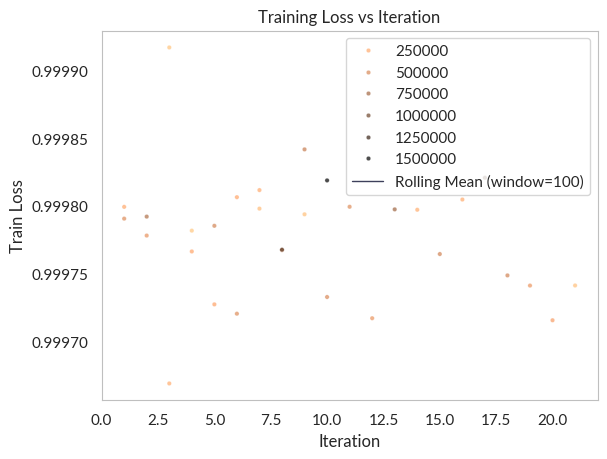

In [43]:
df = pd.read_csv("supernet_result.csv")
sns.scatterplot(data=df, x="iteration", y="train_loss", hue="num_parameters", alpha=0.7, s=10, palette="copper_r")
plt.xlabel("Iteration")
plt.ylabel("Train Loss")
plt.title("Training Loss vs Iteration")

# Calculate and plot rolling mean
window_size = 100
rolling_mean = df.groupby('iteration')['train_loss'].mean().rolling(window=window_size, center=True).mean()
plt.plot(rolling_mean.index, rolling_mean.values, linewidth=1, label=f'Rolling Mean (window={window_size})')
plt.legend()
plt.show()

<Axes: xlabel='iteration', ylabel='num_parameters'>

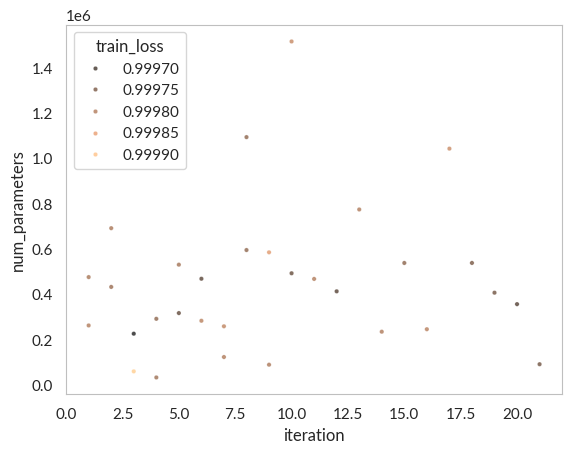

In [44]:
sns.scatterplot(data=df, x="iteration", y="num_parameters", hue="train_loss", alpha=0.7, s=10, palette="copper")

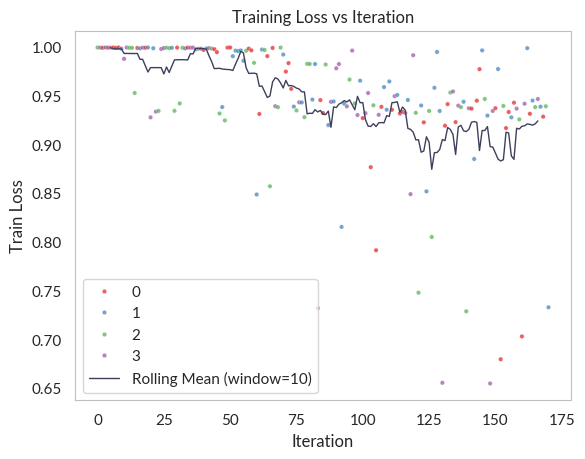

In [45]:
df2 = pd.read_csv("../../runs/pareto_nrpa/df_history.csv")
df2["iteration"] = df2.index
df2["val_loss"] = df2["F"].apply(lambda x: eval(x)[0])
df2["latency"] = df2["F"].apply(lambda x: eval(x)[1])
sns.scatterplot(data=df2, x="iteration", y="val_loss", hue="P", alpha=0.7, s=10, palette="Set1")
plt.xlabel("Iteration")
plt.ylabel("Train Loss")
plt.title("Training Loss vs Iteration")

# Calculate and plot rolling mean
window_size = 10
rolling_mean = df2.groupby('iteration')['val_loss'].mean().rolling(window=window_size, center=True).mean()
plt.plot(rolling_mean.index, rolling_mean.values, linewidth=1, label=f'Rolling Mean (window={window_size})')
plt.legend()
plt.show()

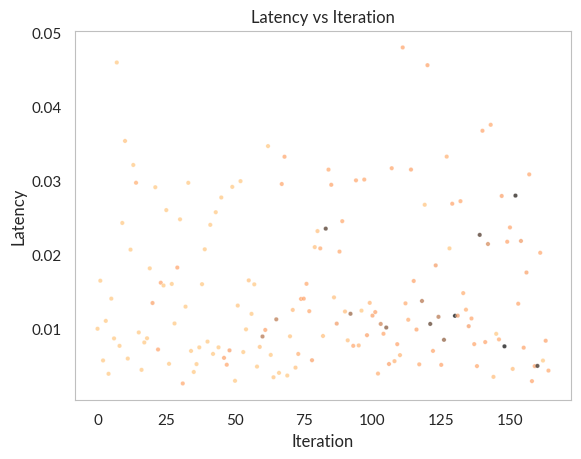

In [41]:
sns.scatterplot(data=df2, x="iteration", y="latency", hue="val_loss", alpha=0.7, s=10, palette="copper", legend=False)
plt.xlabel("Iteration")
plt.ylabel("Latency")
plt.title("Latency vs Iteration")
plt.show()

<Axes: xlabel='latency', ylabel='val_loss'>

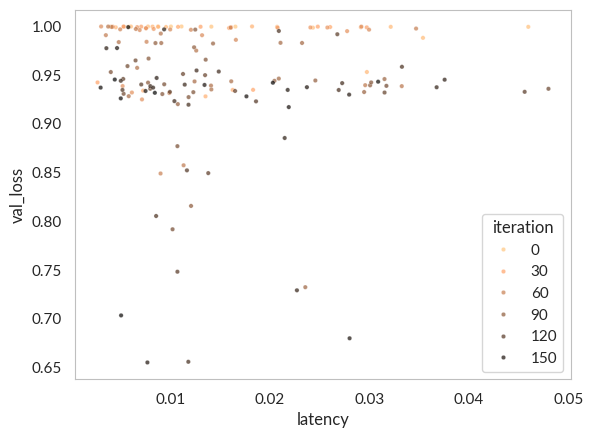

In [42]:
sns.scatterplot(data=df2, x="latency", y="val_loss", hue="iteration", alpha=0.7, s=10, palette="copper_r")

<Axes: xlabel='latency', ylabel='Count'>

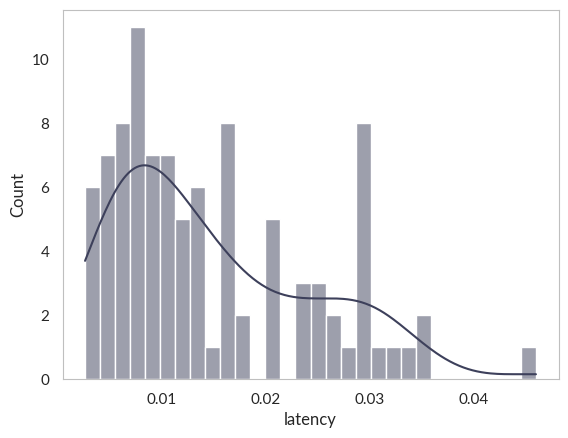

In [25]:
sns.histplot(df2['latency'], bins=30, kde=True)